In [51]:
# Import all the needed libraries
import time
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import requests
from IPython.display import HTML

In [52]:
# Locate the driver
s=Service('/Users/chris/Desktop/Chris1104/Linedln_Crawling/chromedriver.exe')
driver = webdriver.Chrome(service=s)

In [53]:
# Show and maximize Window
driver.maximize_window() 
driver.switch_to.window(driver.current_window_handle)
driver.implicitly_wait(10)

In [54]:
# Enter a login page
driver.get('https://www.linkedin.com/login');
time.sleep(2)

In [55]:
# Reading txt file with my credentials
with open('user_credentials.txt', 'r',encoding="utf-8") as file:
    user_credentials = file.readlines()
    user_credentials = [line.rstrip() for line in user_credentials]
user_name = user_credentials[0] # First line
password = user_credentials[1] # Second line
driver.find_element('xpath','//*[@id="username"]').send_keys(user_name)
driver.find_element('xpath','//*[@id="password"]').send_keys(password)
time.sleep(1)

In [56]:
# Click and Login
driver.find_element('xpath','//*[@id="organic-div"]/form/div[3]/button').click()
driver.implicitly_wait(30)

## Data Analyst Job Market in Western Europe

In [57]:
# Access to the Jobs button and click it
driver.find_element('xpath','//*[@id="global-nav"]/div/nav/ul/li[3]/a').click()
time.sleep(3)

result = []
# Ideal Conditions: 
# 1. Can accept hybrid/onsite/wfm
# 2. Date: past month
# 3. Distance: in 25 km
# 4. There are no other reuqirements
# I am curious to see the job market in western Europe I am interested to live, study, and work.
country = ['Germany','Austria','Netherlands','United Kingdom','Switzerland','Belgium','Luxembourg','France']
for i in range(len(country)):
    # Go to search results directly via link
    url = 'https://www.linkedin.com/jobs/search/?distance=25&f_TPR=r2592000&f_WT=1%2C2%2C3&keywords=data%20analyst&location=' + country[i]
    driver.get(url)
    time.sleep(1)
    result.append(driver.find_element(By.CLASS_NAME, 'jobs-search-results-list__subtitle').text.replace(' results', '') )

In [58]:
# Transform texts into numbers
for i in range(len(result)):
    result[i] =  int(result[i].replace(',',''))

<AxesSubplot:xlabel='Country'>

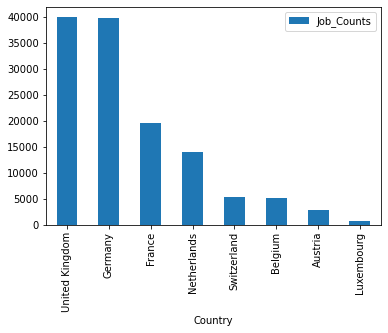

In [59]:
# Transform lists into a dataframe
Linkedln_job_country_list = pd.DataFrame(
    {'Country': country,
     'Job_Counts': result,
    })
# Sort job opportunities 
df = Linkedln_job_country_list.sort_values(by=['Job_Counts'],ascending=False)
# Summary of job counts in each country
df.plot.bar(x='Country', y='Job_Counts')

## Data Analyst Job Data Sets in Western Europe

In [10]:
# Create lists to store information
links = []
job_titles = []
company_names = []
job_desc = []

In [11]:
# Collect the links in each page
max_page = []
max_page_value = 0
page_block = driver.find_element(By.CSS_SELECTOR,'.artdeco-pagination__pages')
page_list= page_block.find_elements(By.CSS_SELECTOR, '.artdeco-pagination__indicator')
for page in page_list:
    max_page.append(page.text)
max_page_value = int(max_page[-1])

for i in range(max_page_value):
    jobs_block = driver.find_element(By.CLASS_NAME,'jobs-search-results-list')
    jobs_list= jobs_block.find_elements(By.CLASS_NAME, 'jobs-search-results__list-item')
    for job in jobs_list:
        # scroll down for each job element
        driver.execute_script('arguments[0].scrollIntoView();', job)
        all_links = job.find_elements(By.TAG_NAME,'a')
        for a in all_links:
            if str(a.get_attribute('href')).startswith("https://www.linkedin.com/jobs/view") and a.get_attribute('href') not in links: 
                links.append(a.get_attribute('href'))
            else:
                pass
    # Fit the page number:
    if i == (max_page_value-1):
        break
    else:
        k = i+ 2
        # go to next page:
        driver.find_element('xpath','//button[@aria-label="Page '+str(k)+'"]').click()
        time.sleep(3)
    i+=1

In [12]:
i = 0
j = 1
# Visit each link one by one to scrape the information
for i in range(len(links)):
    try:
        driver.get(links[i])
        i=i+1
        time.sleep(5)
        driver.find_elements(By.CSS_SELECTOR,".artdeco-card__action")[0].click()
    except:
        pass
    
    # Find the general information of the job offer
    # Used try, except in case there is some missing information for some of the job offers
    contents = driver.find_elements(By.CLASS_NAME,'p5')
    for content in contents:
        try:
            job_titles.append(content.find_element(By.TAG_NAME,"h1").text)
            company_names.append(content.find_element(By.CLASS_NAME,"jobs-unified-top-card__company-name").text)
            j+= 1
            
        except:
            pass
        time.sleep(5)
        
        # Scraping the job description
    job_description = driver.find_elements(By.CSS_SELECTOR,'.jobs-description__container')
    for description in job_description:
        job_desc.append(job_description[0].text)
        print(f'Scraping the Job Offer {j} DONE.')
        time.sleep(2) 

Scraping the Job Offer 2 DONE.
Scraping the Job Offer 3 DONE.
Scraping the Job Offer 4 DONE.
Scraping the Job Offer 5 DONE.
Scraping the Job Offer 6 DONE.
Scraping the Job Offer 7 DONE.
Scraping the Job Offer 8 DONE.
Scraping the Job Offer 9 DONE.
Scraping the Job Offer 10 DONE.
Scraping the Job Offer 11 DONE.
Scraping the Job Offer 12 DONE.
Scraping the Job Offer 13 DONE.
Scraping the Job Offer 14 DONE.
Scraping the Job Offer 15 DONE.


ProtocolError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [47]:
# Creating a new dataframe 
df2 = pd.DataFrame(list(zip(job_titles,company_names,job_desc,links)), columns =['job_title', 'company_name','job_description','job_links'])
# Storing the data to csv file
df2.to_csv('France_job_oppotunities.csv', index=False)

In [48]:
HTML(df2.to_html(render_links=True, escape=False))